$$Sigmoid(x) = \frac{1}{1 + e^{-0.5x}}$$
$$Sigmoid(x) = \frac{1}{1 + e^{-x}}$$
$$Sigmoid(x) = \frac{1}{1 + e^{-2x}}$$

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 10.01, 0.01)
y1 = 1 / (1 + np.exp(-0.5 * x))
y2 = 1 / (1 + np.exp(-x))
y3 = 1 / (1 + np.exp(-2 * x))

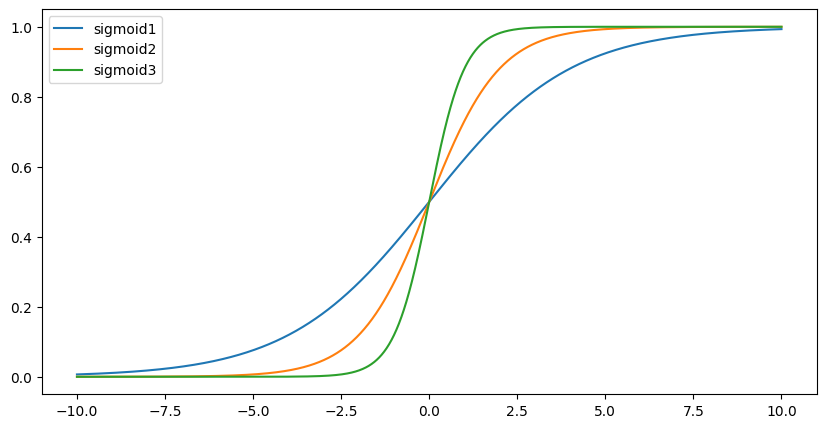

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(["sigmoid1", "sigmoid2", "sigmoid3"])

<p>시그모이드 함수 **장점** </br>
1. 기울기 폭주가 일어나지 않음 </br>
2. 미분식이 겁나 간단함 </br>

ㅠㅠ 단점</br>
1. 기울기 소실 (x->infinit면 기울기 값이 0으로 수렴) </br>
2. 입력 데이터가 항상 양수이면 기울기 값이 모두 양수거나 모두 음수여서 기울기가 지그재그 형태로 변동하는 어쩌구저쩌구가 발생</p>

$$ MSE = (\hat {Y_i} - {Y_i})^2 \\
MSE = (0.99999999999 - 1)^2 \simeq 0 \\
MSE = (0.00000000001 - 0)^2 \simeq 0 \\
MSE = (0.00000000001 - 1)^2 \simeq 1 $$

<p> MSE가 특정 상황에선 매우 비효율적일 수 있음 </br>
이 경우 이친 교차 엔트로피(Binary Cross Entropy, BCE)를 오차 함수로 사용하기도 함</p>

$$ BCE_1 = -{Y_i} \cdot \log(\hat {Y_i}) \\
BCE_2 = -(1-{Y_i}) \cdot \log(1 - \hat {Y_i}) \\
BCE = BCE_1 + BCE_2 \\
= -(Y_i \cdot \log(\hat {Y_i}) + (1-Y_i) \cdot \log(1 - \hat {Y_i}))
$$

C:\Users\dlwns\AppData\Local\Temp\ipykernel_1836\2296172179.py:5: RuntimeWarning: divide by zero encountered in log
  y1 = -(np.log(x))
C:\Users\dlwns\AppData\Local\Temp\ipykernel_1836\2296172179.py:6: RuntimeWarning: divide by zero encountered in log
  y2 = -(np.log(1-x))


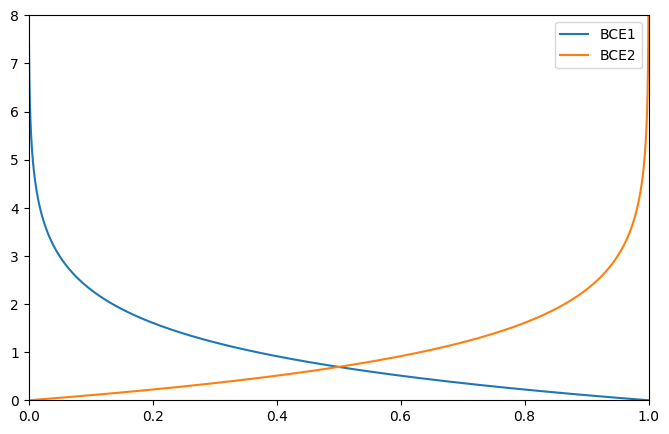

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1+1e-4, 1e-4)
y1 = -(np.log(x))
y2 = -(np.log(1-x))

plt.figure(figsize=(8, 5))
plt.ylim(0, 8)
plt.xlim(0, 1)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['BCE1', 'BCE2'])

$ BCE_{Y_i =1, \hat {Y_l} \simeq 1} = (Y_i \cdot \log(\hat {Y_l}) + (1 - Y_i) \cdot \log(1 - \hat Y_l)) \\
\qquad \qquad \qquad= -(1 \cdot \log(0.9999999999) + (1 - 1) \cdot \log(1 - 0.9999999999)) \\
\qquad \qquad \qquad\simeq 0 \\
BCE_{Y_i =1, \hat {Y_l} \simeq 1} = (Y_i \cdot \log(\hat {Y_l}) + (1 - Y_i) \cdot \log(1 - \hat Y_l)) \\
\qquad \qquad \qquad= -(1 \cdot \log(0.0000000001) + (1 - 1) \cdot \log(1 - 0.0000000001)) \\
\qquad \qquad \qquad\simeq 12
$

$$ BCE = - \frac {1}{n} \sum_{i=1}^{n}(Y_i \cdot \log(\hat {Y_i}) + (1 - Y_i) \cdot \log(1 - \hat {Y_i}))

In [5]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd

In [7]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values
        self.x2 = df.iloc[:, 1].values
        self.x3 = df.iloc[:, 2].values
        self.y = df.iloc[:, 3].values
        self.length = len(df)
        
    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index], self.x3[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y
    
    def __len__(self):
        return self.length

In [9]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.layer(x)
        return x

In [10]:
dataset = CustomDataset("data/binary.csv")
dataset_size = len(dataset)

train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = int(dataset_size * 0.1)

train_dataset, validation_dataset, test_dataset = random_split(
    dataset, [train_size, validation_size, test_size]
)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-4)

In [12]:
for epoch in range(10000):
    cost = 0.0
    
    for batch in train_dataloader:
        x, y = batch
        x, y = x.to(device), y.to(device)
        
        output = model(x)
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss
        
    cost = cost / len(train_dataloader)
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch + 1}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

C:\Users\dlwns\AppData\Local\Temp\ipykernel_1836\1326870788.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Model : [Parameter containing:
tensor([[0.0056, 0.0050, 0.0054]], requires_grad=True), Parameter containing:
tensor([-0.4270], requires_grad=True)], Cost : 0.629
Epoch : 2000, Model : [Parameter containing:
tensor([[0.0054, 0.0050, 0.0056]], requires_grad=True), Parameter containing:
tensor([-0.5485], requires_grad=True)], Cost : 0.616
Epoch : 3000, Model : [Parameter containing:
tensor([[0.0059, 0.0056, 0.0060]], requires_grad=True), Parameter containing:
tensor([-0.6669], requires_grad=True)], Cost : 0.606
Epoch : 4000, Model : [Parameter containing:
tensor([[0.0066, 0.0060, 0.0066]], requires_grad=True), Parameter containing:
tensor([-0.7825], requires_grad=True)], Cost : 0.594
Epoch : 5000, Model : [Parameter containing:
tensor([[0.0070, 0.0067, 0.0072]], requires_grad=True), Parameter containing:
tensor([-0.8953], requires_grad=True)], Cost : 0.588
Epoch : 6000, Model : [Parameter containing:
tensor([[0.0074, 0.0070, 0.0077]], requires_grad=True), Parameter containin

In [14]:
with torch.no_grad():
    model.eval()
    for batch in validation_dataloader:
        x, y = batch
        x, y = x.to(device), y.to(device)
        
        outputs = model(x)
        
        print(outputs)
        print(outputs >= torch.FloatTensor([0.5]).to(device))
        print("-------------------")

tensor([[0.2368],
        [0.4728],
        [0.5664],
        [0.4887]])
tensor([[False],
        [False],
        [ True],
        [False]])
-------------------
tensor([[0.6496],
        [0.6020],
        [0.2758],
        [0.3025]])
tensor([[ True],
        [ True],
        [False],
        [False]])
-------------------
tensor([[0.7518],
        [0.5502],
        [0.5280],
        [0.4078]])
tensor([[ True],
        [ True],
        [ True],
        [False]])
-------------------
tensor([[0.5135],
        [0.6800],
        [0.6318],
        [0.6898]])
tensor([[True],
        [True],
        [True],
        [True]])
-------------------
tensor([[0.4658],
        [0.4016],
        [0.6414],
        [0.6267]])
tensor([[False],
        [False],
        [ True],
        [ True]])
-------------------
tensor([[0.5134],
        [0.5950],
        [0.6309],
        [0.5986]])
tensor([[True],
        [True],
        [True],
        [True]])
-------------------
tensor([[0.4230],
        [0.6934],


C:\Users\dlwns\AppData\Local\Temp\ipykernel_1836\1326870788.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


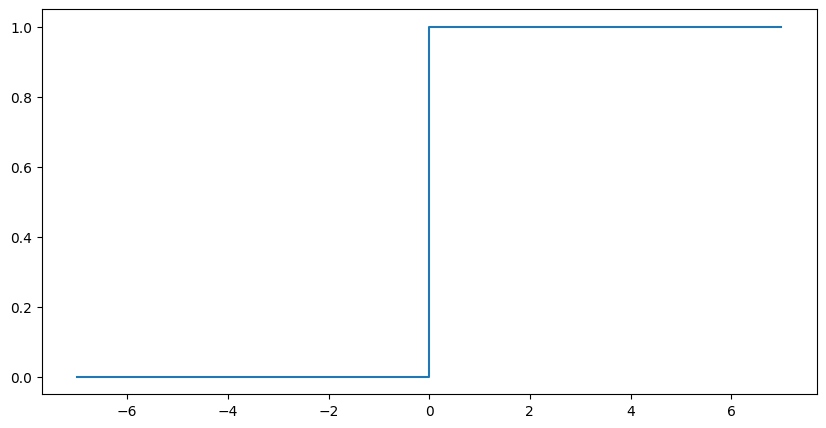

In [8]:
import matplotlib.pyplot as plt

x = range(-7, 8, 1)
x = list(x)
y = [0 if value < 0 else 1 for value in x]
x.append(0)
x.sort()
y.append(0)
y.sort()

plt.figure(figsize=(10, 5))
plt.plot(x, y) # 계단함수(Step function)

$$ \text{Step}(x) =
\begin{cases} 
1 & \text{if } x \geq 0 \\
0 & \text{otherwise}
\end{cases} $$

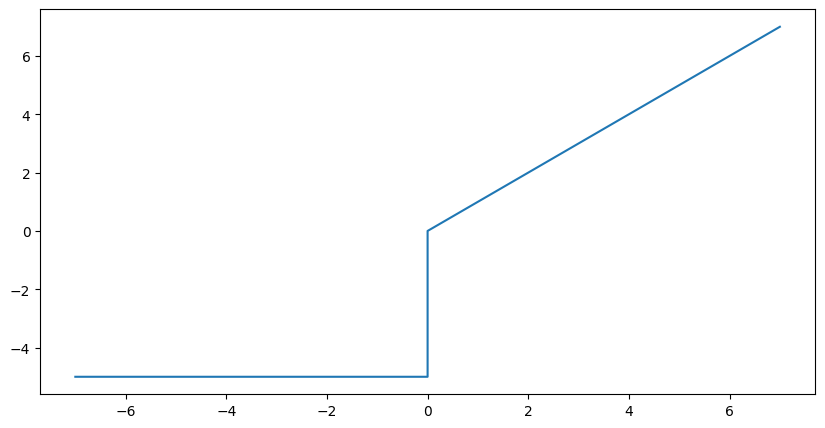

In [16]:
x = range(-7, 8)
x = list(x)
x.append(0)
x.sort()

step = 0
y = []
for value in x:
    if value <= 0 and step == 0:
        y.append(-5)
        if value == 0:
            step += 1
    else:
        y.append(value)
        
plt.figure(figsize=(10, 5))
plt.plot(x, y)

$$ Threshold(x) =
\begin{cases}
x & if: \quad x > threshold \\
value & else: \quad otherwise
\end{cases} $$

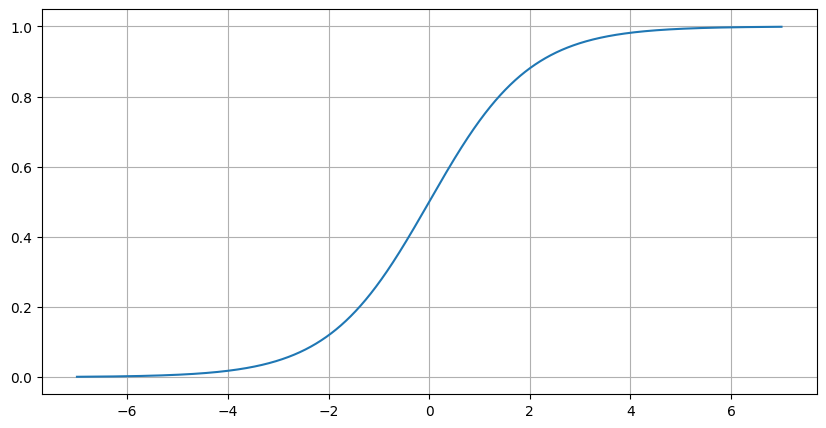

In [22]:
import numpy as np

x = np.arange(-7, 7+1e-3, 1e-3)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(x, y)

$$ Sigmoid(x) = \sigma(x) = \frac{1}{1 + e^{-x}}

<p style="color:red">활성화 함수 더 그리기 귀찮아서 나중으로 미룸 ㅅㄱ</p>



$$
\text {foward propagation} \\
\hat y = activation(weight \times x + bias)
$$

In [27]:
import torch 
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()
        )
        
        self.layer1[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[0.4532, 0.3545],
                          [0.1951, 0.4835]])
        )
        self.layer1[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.1419, 0.0439])
        )
        self.layer2[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[-0.1725, 0.1129]])
        )
        self.layer2[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.3043])
        )
        
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)